In [104]:
import pandas as pd
import numpy as np

#Get Draft Combine measurements (complete data available from 2010-2017)
draft_combine_measurements = pd.read_csv("C:/Users/Rishabh Patni/Desktop/Projects/Draft Combine Data/achou-nba-draft-combine-measurements/nba_draft_combine_all_years.csv")
draft_combine_measurements = draft_combine_measurements[draft_combine_measurements["Year"] > 2009]
draft_combine_measurements = draft_combine_measurements.set_index("Player")
list_of_columns = ['Height (No Shoes)', 'Wingspan', 'Standing reach', 'Vertical (Max)', 'Weight', 'Body Fat', 'Hand (Length)', 'Hand (Width)', 'Sprint']
draft_combine_measurements = draft_combine_measurements[list_of_columns]

In [105]:
# Get player's stats by season (dataset goes back to 1950)
all_players_stats = pd.read_csv("C:/Users/Rishabh Patni/Desktop/Projects/Draft Combine Data/achou-nba-draft-combine-measurements/Seasons_Stats.csv")
all_players_stats = all_players_stats[all_players_stats["Year"] > 2009]
columns_to_keep = ['Year', 'Player', 'Pos', 'MP',
       'PER', 'TS%', '3PAr', 'FTr', 'ORB%', 'DRB%', 'TRB%', 'AST%', 'STL%',
       'BLK%', 'TOV%', 'USG%', 'WS/48', 'FG%', '3P%', '2P%', 'eFG%', 'FT%', 'PF', 'PTS']
all_players_stats = all_players_stats[columns_to_keep].set_index("Player")
#

In [106]:
# Merging Datasets and filtering to include only players who've played
# more than 700 minutes in a season (also no multiple positions)
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
final_set = pd.merge(all_players_stats, draft_combine_measurements, how = 'inner', left_index = True, right_index = True)
list1 = ['PG', 'SG', 'SF', 'PF', 'C']
final_set = final_set[(final_set["MP"] >= 700) & (final_set['Pos'].isin(list1))]
final_set = final_set.dropna()
final_set

,Year,Pos,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,...,PTS,Height (No Shoes),Wingspan,Standing reach,Vertical (Max),Weight,Body Fat,Hand (Length),Hand (Width),Sprint
Player,,,,,,,,,,,,,,,,,,,,,
Aaron Gordon,2015.0,PF,797.0,11.4,0.517,0.231,0.293,6.4,17.8,12.0,...,243.0,79.50,83.75,105.0,39.0,220.0,5.1,8.75,10.50,3.27
Aaron Gordon,2016.0,PF,1863.0,17.0,0.541,0.245,0.333,9.0,21.3,15.1,...,719.0,79.50,83.75,105.0,39.0,220.0,5.1,8.75,10.50,3.27
Aaron Gordon,2017.0,SF,2298.0,14.4,0.530,0.309,0.251,5.3,14.1,9.6,...,1019.0,79.50,83.75,105.0,39.0,220.0,5.1,8.75,10.50,3.27
Al-Farouq Aminu,2011.0,SF,1452.0,9.6,0.499,0.352,0.293,6.1,15.4,10.8,...,457.0,79.25,87.25,108.5,33.5,216.0,8.2,9.50,9.50,3.30
Al-Farouq Aminu,2012.0,SF,1477.0,10.6,0.481,0.129,0.312,7.8,16.9,12.4,...,399.0,79.25,87.25,108.5,33.5,216.0,8.2,9.50,9.50,3.30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Xavier Henry,2012.0,SG,759.0,9.2,0.450,0.075,0.373,3.8,12.7,8.3,...,239.0,77.25,83.25,105.0,36.5,210.0,4.7,8.75,10.00,3.18
Xavier Henry,2014.0,SF,908.0,12.3,0.511,0.235,0.513,2.9,10.5,6.7,...,432.0,77.25,83.25,105.0,36.5,210.0,4.7,8.75,10.00,3.18
Zach LaVine,2015.0,PG,1902.0,11.3,0.515,0.247,0.261,1.6,11.6,6.4,...,778.0,76.50,80.25,100.0,41.5,181.0,4.7,8.25,8.75,3.19


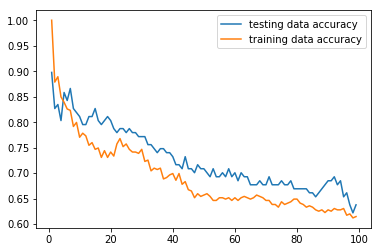

In [107]:
### Performing KNN on a combination of Stats and Draft Combine Measurements
only_stats = final_set
y = only_stats ["Pos"]
X = only_stats[["ORB%", "DRB%", "TS%", "3PAr", "FTr", 'AST%', 'BLK%', 'FT%',
                'Height (No Shoes)','Wingspan',  'Standing reach', 'Vertical (Max)',
        'Weight', 'Hand (Length)']]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

df = pd.DataFrame(columns = ['number of neighbors', 'score'])
for i in range(99):
    knn = KNeighborsClassifier(n_neighbors = (i+1))
    knn.fit(X_train, y_train)
    df = df.append({'number of neighbors': (i+1), 'testing data accuracy': knn.score(X_test, y_test), 'training data accuracy': knn.score(X_train, y_train)}, ignore_index= True)
    
import matplotlib.pyplot as plt
plt.figure()
plt.plot(df["number of neighbors"], df["testing data accuracy"])
plt.plot(df["number of neighbors"], df["training data accuracy"])
plt.legend()
plt.show()


In [108]:
### Performing KNN only looking at Stats (Both Datasets)
only_stats = final_set
y = only_stats ["Pos"]
X = only_stats[["ORB%", "DRB%", "TS%", "3PAr", "FTr", 'AST%', 'BLK%', 'FT%']]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)


df = pd.DataFrame(columns = ['number of neighbors', 'score'])
for i in range(99):
    knn = KNeighborsClassifier(n_neighbors = (i+1))

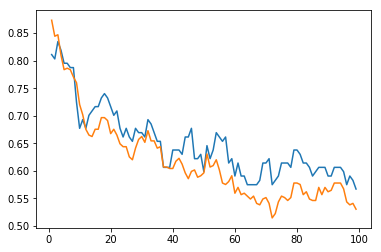

In [109]:
### Performing KNN only looking at draft combine stats
only_stats = final_set
y = only_stats ["Pos"]
X = only_stats[['Height (No Shoes)', 'Wingspan', 
                'Standing reach', 'Vertical (Max)', 'Weight','Hand (Length)']]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)


df = pd.DataFrame(columns = ['number of neighbors', 'score'])
for i in range(99):
    knn = KNeighborsClassifier(n_neighbors = (i+1))
    knn.fit(X_train, y_train)
    df = df.append({'number of neighbors': (i+1), 'score': knn.score(X_test, y_test), 'training score': knn.score(X_train, y_train)} , ignore_index= True)
    
plt.figure()
plt.plot(df["number of neighbors"], df["score"])
plt.plot(df["number of neighbors"], df["training score"])

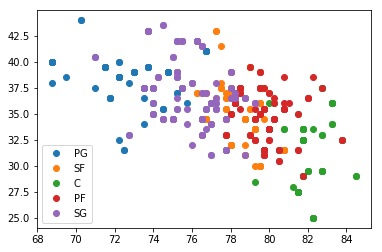

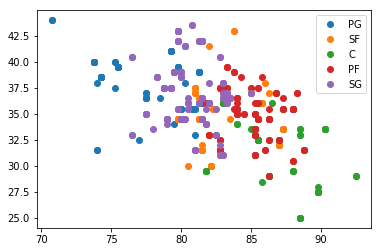

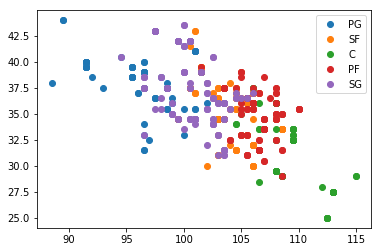

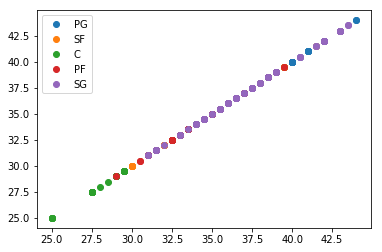

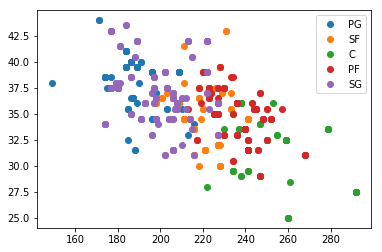

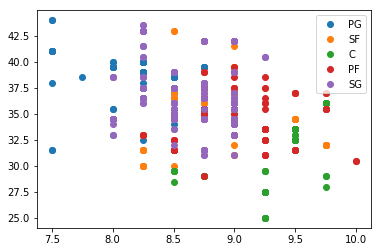

In [110]:
# Plotting
columns = ["PER", "TS%", "3PAr", "FTr", "ORB%", "DRB%", "TRB%", 'AST%', 'STL%',
       'BLK%', 'TOV%', 'USG%', 'WS/48', 'FG%', '3P%', '2P%', 'eFG%', 'FT%']

columns2 = ['Height (No Shoes)', 'Wingspan', 'Standing reach', 'Vertical (Max)',
        'Weight', 'Hand (Length)']

for i in columns2:
    plt.figure()
    names = set(y)
    for name in names: 
        cond = y == name
        plt.plot(X[i][cond], X['Vertical (Max)'][cond],linestyle='none', marker='o', label = name)
    plt.legend(numpoints=1)

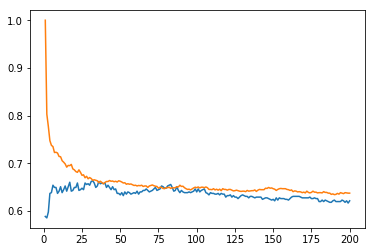

In [111]:
### When only looking at Stats 
only_stats = all_players_stats[all_players_stats["MP"]>700].dropna()
y = only_stats ["Pos"]
X = only_stats[["ORB%", "DRB%", "TS%", "3PAr", "FTr", 'AST%', 'BLK%', 'FT%']]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)


df = pd.DataFrame(columns = ['number of neighbors', 'score'])
for i in range(200):
    knn = KNeighborsClassifier(n_neighbors = (i+1))
    knn.fit(X_train, y_train)
    df = df.append({'number of neighbors': (i+1), 'score': knn.score(X_test, y_test), 'training score': knn.score(X_train, y_train)}, ignore_index= True)
    
plt.figure()    
plt.plot(df["number of neighbors"], df["score"])
plt.plot(df["number of neighbors"], df["training score"])

In [98]:
#Final Output
### Performing KNN on a combination of Stats and Draft Combine Measurements
only_stats = final_set
y = only_stats ["Pos"]
X = only_stats[["ORB%", "DRB%", "TS%", "3PAr", "FTr", 'AST%', 'BLK%', 'FT%',
                'Height (No Shoes)','Wingspan',  'Standing reach', 'Vertical (Max)',
        'Weight', 'Hand (Length)']]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

df = pd.DataFrame(columns = ['number of neighbors'])
for i in range(40):
    knn = KNeighborsClassifier(n_neighbors = (i+1))
    knn.fit(X_train, y_train)
    df = df.append({'number of neighbors': (i+1), 'testing data accuracy': knn.score(X_test, y_test), 'training data accuracy': knn.score(X_train, y_train)}, ignore_index= True)
    
df

#looking at data, to ensure model does not overfit while maintaining accuracy, we pick k = 19.
ctf = KNeighborsClassifier(n_neighbors = 19)
ctf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=19, p=2,
                     weights='uniform')

In [112]:
#Insert Inputs here
ORB = 0.05
DRB = 0.15
True_Shooting = 0.57
Three_Point_Rate = 0.3
Assist_Percentage = 0.15
Block_Percentage = 0.04
Free_Throw_Rate = 0.2
Free_Throw_Percentage = 0.82

#In Inches
Height = 80
Wingspan = 80
Standing_Reach = 110
Vertical = 35
Weight = 180
Hand_Length = 8

df = pd.DataFrame(columns =["ORB%", "DRB%", "TS%", "3PAr", "FTr", 'AST%', 'BLK%', 'FT%',
                'Height (No Shoes)','Wingspan',  'Standing reach', 'Vertical (Max)',
        'Weight', 'Hand (Length)'])
df = df.append({"ORB%":ORB, "DRB%":DRB, "TS%":True_Shooting, "3PAr":Three_Point_Rate,'AST%':Assist_Percentage,'BLK%' :Block_Percentage, 
           "FTr":Free_Throw_Rate,'FT%' :Free_Throw_Percentage,'Height (No Shoes)' :Height, 'Wingspan':Wingspan, 
           'Standing reach':Standing_Reach, 'Vertical (Max)':Vertical, 'Weight':Weight,'Hand (Length)' :Hand_Length}, ignore_index = True)
z = ctf.predict(df)
z[0]

'SG'